<span style='color:Blue ;
             font-size:30px;'>
    Sensing, perception, and actuation.  </span><br>
<span style='color:Blue ;
             font-size:30px;'>
    Assignment №1.  </span><br>
<span style='color:Red ;
             font-size:15px;'>
    Student : Amir Zakirov.  </span><br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### Home assignment 1.1: Check the Central Limit Theorem

##### Building two-modal distribution (like above) generating many points

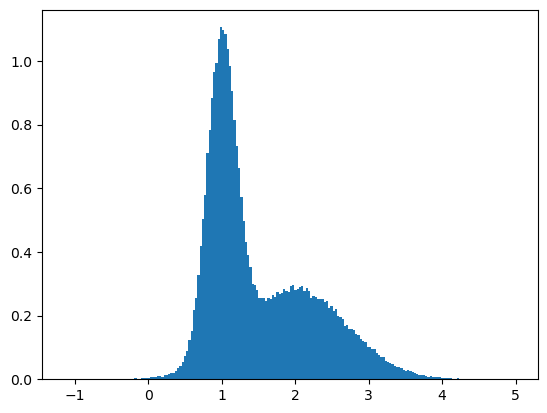

In [4]:
mu = [2,1] #Expected value
sigma = [0.7,0.2] #Standard deviation
N = int(1e5) #Number of samples

#Generating points
s1 = np.random.normal(mu[0],sigma[0],N)
s2 = np.random.normal(mu[1],sigma[1],N)
#Concatenate s1 and s2
s=np.concatenate((s1,s2),axis = 0)
y,x,_ = plt.hist(s, 200 , density = True)
plt.show()

##### Taking samples (e.g. 100 values) and computing mean value 
##### and plotting distribution with mean values from many samples


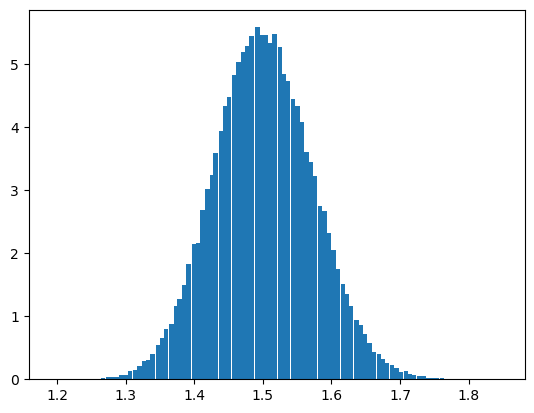

In [5]:
mean_values = np.linspace(0,0,N).astype(np.float16)
for i in range(N):
    mean_values[i] = np.random.choice(s,100).mean()
y,x,_ = plt.hist(mean_values, 100 , density = True)
plt.show()

## Home assignment 1.2:  Apply polynomial or nonlinear regression for data analysis

##### 1.Generating noisy data points (with nonlinear relationship, i.e. mix a model points + noise points):
##### Where model function:
\begin{equation*}
y_{model} = a +  {x^2}*{sin(bx)}
\end{equation*}


In [6]:
def y_model(x,a,b):
    return a +  x**2 * np.sin(b*x)

#random choise of some grid:
x = np.linspace(0,10,N)
x = np.sort(np.random.choice(x,100))

#external parameters
a , b = 20 , 2
#sum of model function with noise
Noise_amplitude = 3
Y = y_model(x,a,b) + Noise_amplitude * np.random.normal(0,1,100)

##### Using least square regression or pseudoinverse or optimize.curve_fit methods (on your choice)


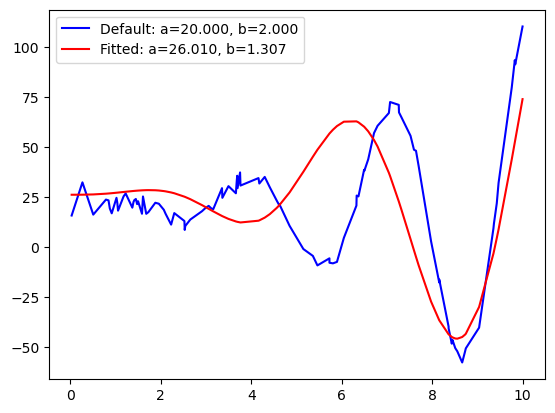

In [7]:
#Fit for the parameters a and b of y_model-function:
params,_ = curve_fit(y_model, x, Y)
plt.plot(x,Y, 'b-',
        label='Default: a=%5.3f, b=%5.3f' % (a,b))
plt.plot(x, y_model(x, *params), 'r-',
         label='Fitted: a=%5.3f, b=%5.3f' % tuple(params))
plt.legend()
plt.show()